# 다중분류
- 아이리스 데이터셋

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 데이터 준비

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
## 데이터 분리

X = df.drop(['species'], axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=2022)

print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [ ]:
y_train.value_counts()

1    40
2    40
0    40
Name: species, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

In [ ]:
y_train

array([1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 0, 2, 1])

In [ ]:
from tensorflow.keras.utils import to_categorical                             #다중분류일 경우 원핫 인코딩 필요

y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

# 모델

In [ ]:
X_train_s.shape

(120, 4)

In [ ]:
y_train_oh.shape

(120, 3)

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),               #X_train_s shape과 input_shape 일치
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')                                #y_train_oh shape과 units 일치 / 다중분류:softmax
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',                                     #다중분류:categorical_crossentropy
    metrics=['acc']
)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                320       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_oh,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/200
3/3 [==============================] - 1s 95ms/step - loss: 1.0427 - acc: 0.5625 - val_loss: 1.0442 - val_acc: 0.5833
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.9795 - acc: 0.6562 - val_loss: 0.9870 - val_acc: 0.5833
Epoch 3/200
3/3 [==============================] - 0s 14ms/step - loss: 0.9252 - acc: 0.6875 - val_loss: 0.9313 - val_acc: 0.5833
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.8715 - acc: 0.6875 - val_loss: 0.8788 - val_acc: 0.5833
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.8213 - acc: 0.6667 - val_loss: 0.8292 - val_acc: 0.5833
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.7785 - acc: 0.6979 - val_loss: 0.7831 - val_acc: 0.5833
Epoch 7/200
3/3 [==============================] - 0s 13ms/step - loss: 0.7377 - acc: 0.7812 - val_loss: 0.7417 - val_acc: 0.6667
Epoch 8/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6998 - acc: 0.81

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
## 시각화

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

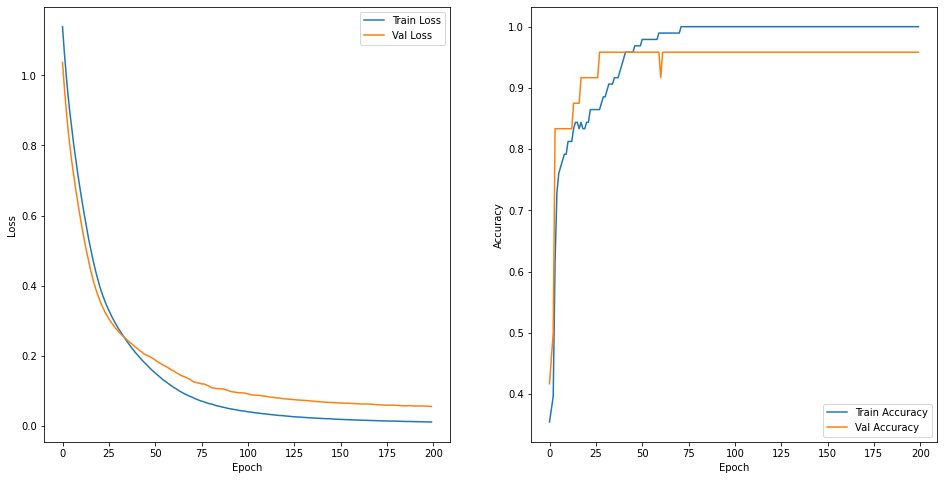

In [ ]:
plot_history(history)

In [ ]:
# 평가

model.evaluate(X_train_s, y_train_oh)

4/4 [==============================] - 0s 3ms/step - loss: 0.0193 - acc: 0.9917


[0.019266128540039062, 0.9916666746139526]

In [ ]:
X_test_s = scaler.transform(X_test)
y_test_oh = to_categorical(y_test)

In [ ]:
model.evaluate(X_test_s, y_test_oh)

1/1 [==============================] - 0s 20ms/step - loss: 0.1887 - acc: 0.9667


[0.18868017196655273, 0.9666666388511658]

In [ ]:
# 예측

y_pred = model.predict(X_test_s)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[9.26423297e-07, 4.21067598e-05, 9.99956906e-01],
       [9.99900520e-01, 9.94062575e-05, 1.97686023e-09],
       [8.81781743e-04, 5.01546144e-01, 4.97572064e-01],
       [7.31669425e-04, 9.95651841e-01, 3.61649343e-03],
       [9.99791145e-01, 2.08955811e-04, 3.48424900e-10],
       [9.99923050e-01, 7.68320970e-05, 9.19544274e-10],
       [6.86950283e-04, 3.06334663e-02, 9.68679488e-01],
       [9.99777555e-01, 2.22373303e-04, 1.25062294e-10],
       [3.34687560e-04, 2.89112702e-02, 9.70754027e-01],
       [9.98657286e-01, 1.34277879e-03, 9.49459977e-09],
       [1.96249184e-05, 3.03964820e-02, 9.69583869e-01],
       [9.99951899e-01, 4.80106173e-05, 8.01184397e-11],
       [1.82194435e-05, 4.43384255e-04, 9.99538362e-01],
       [7.75980936e-07, 1.00513877e-04, 9.99898612e-01],
       [2.84238197e-08, 4.37876088e-06, 9.99995530e-01],
       [8.20572313e-05, 9.99752879e-01, 1.65044985e-04],
       [5.16546483e-04, 9.99214709e-01, 2.68716947e-04],
       [1.10506755e-06, 3.24567

In [ ]:
y_test_oh

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
y_test.values

array([2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 2])

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 2])

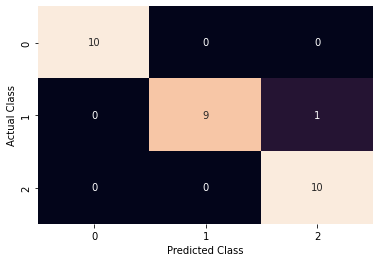

In [ ]:
# y_pred, y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()